In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Most people didn't survive
# Most passengers were at the 2nd or 3d passenger classes
# Most of the passengers were relatively young (30 years old)
# Most people didn't come with sublings/spouses or they came with 1 relative
# Most people didn't come with parents/children
# 7-32-57 - fair distribution

In [10]:
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
# Most passengers were male
# The highest amount of passengers per ticket was 7
# Probably some families on the titanic
# Most passengers embarked at Southhampton

In [18]:
titanic_df.groupby('Pclass')['Survived','Age'].mean()

/var/folders/34/j9nmmb454pbcr_rhcc4thkv80000gn/T/ipykernel_51487/3449989949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  titanic_df.groupby('Pclass')['Survived','Age'].mean()


,Survived,Age
Pclass,,
1,0.629630,38.233441
2,0.472826,29.877630
3,0.242363,25.140620


In [19]:
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [20]:
titanic_df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Text(0.5, 0, 'Ages')

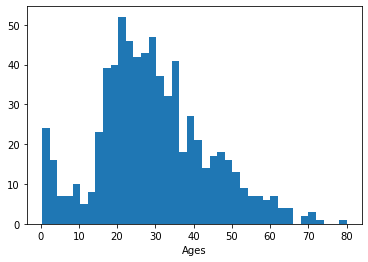

In [24]:
fig, ax = plt.subplots()

ax.hist(titanic_df['Age'], bins=40)
ax.set_xlabel('Ages')

In [26]:
not_survived_df = titanic_df[titanic_df['Survived'] == 0]
survived_df = titanic_df[titanic_df['Survived'] == 1]

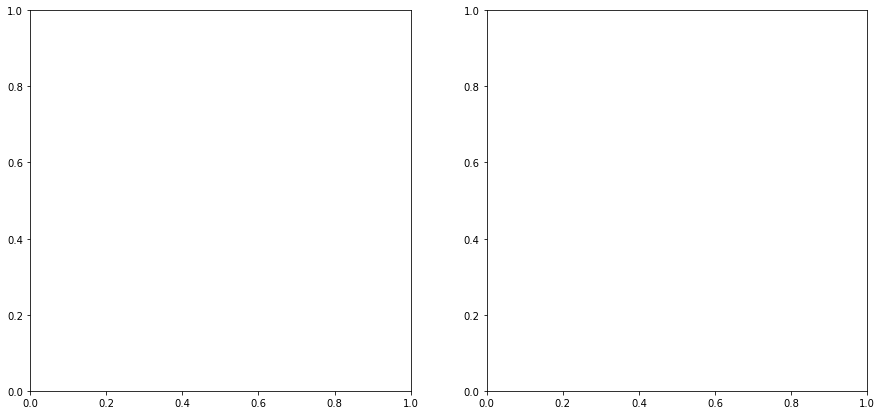

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,7)

In [36]:
ax[0].hist(not_survived_df['Age'], bins=40, facecolor='g')
ax[0].set_xlabel('Ages')
ax[0].set_title('Not survived')

ax[1].hist(survived_df['Age'], bins=40)
ax[1].set_xlabel('Ages')
ax[1].set_title('Survived')

Text(0.5, 1.0, 'Survived')

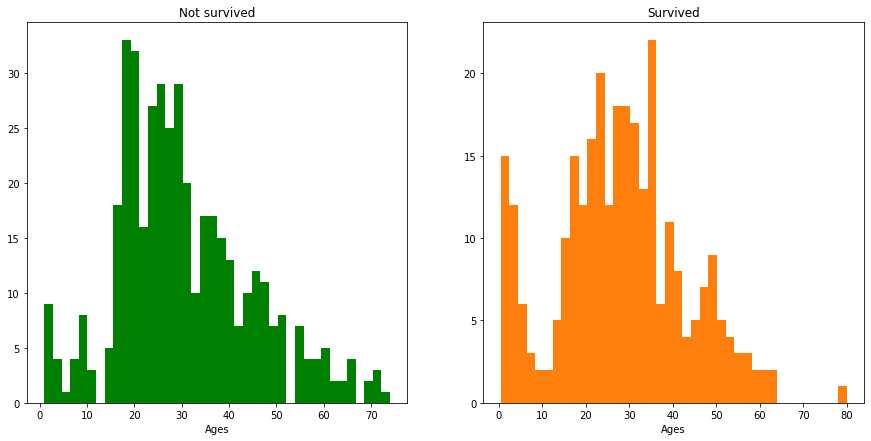

In [37]:
fig

In [35]:
titanic_df[titanic_df['Age'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [51]:
first_class = titanic_df[titanic_df['Pclass'] == 1]
labels = ['Survived', 'Not Survived']

firstC_survived = len(first_class[first_class['Survived'] == 1])
firstC_not_survived = len(first_class[first_class['Survived'] == 0])

data = [firstC_survived, firstC_not_survived]

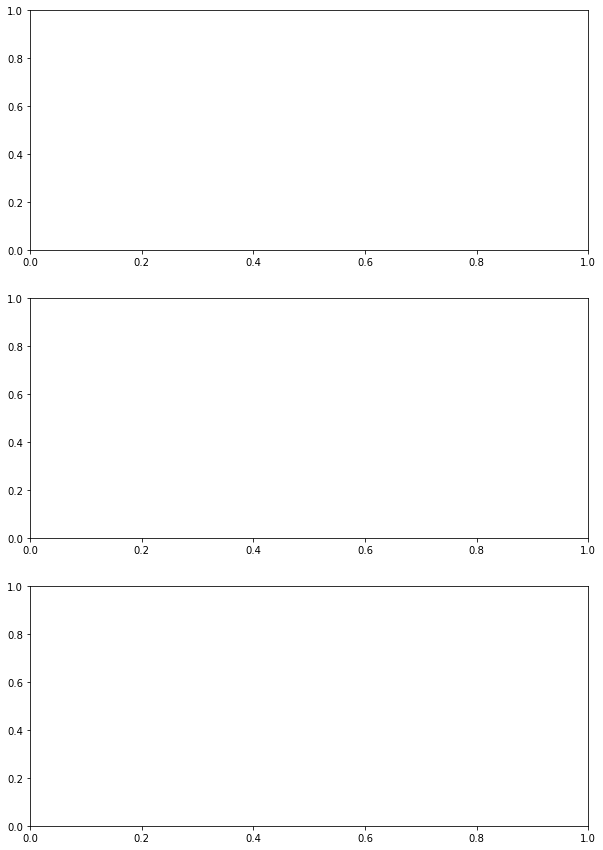

In [63]:
figure, ax = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(10,15)

In [68]:
ax[0].pie(data, labels = labels, autopct='%1.1f%%')
ax[0].set_title('First Class')

Text(0.5, 1.0, 'First Class')

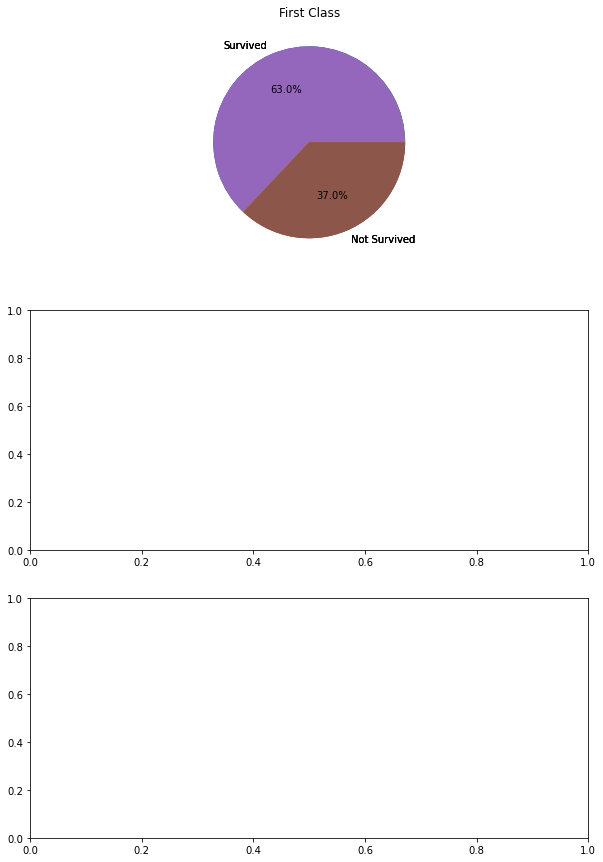

In [69]:
figure